
1)Find the location where startups has received funding maximum number of times.
Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. 
Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign.
Consider the startup if any one of the city lies in given locations.

2)Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

3)Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

4)Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

5)Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

1)

['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida']
[628, 446, 385, 240, 78]


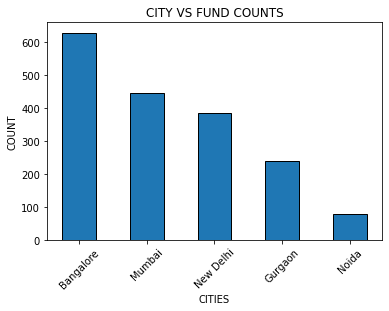

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('startupfundings.csv')
df.dropna(subset=['CityLocation'])
df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)
df=df[(df.CityLocation=='Bangalore') | (df.CityLocation == 'New Delhi') | (df.CityLocation == 'Noida') | (df.CityLocation == 'Gurgaon') | (df.CityLocation == 'Mumbai')]

d={}
for i in df['CityLocation']:
    if i in d:
        d[i]+=1
    else:
        d[i]=1
        
x=list(d.keys())
y=list(d.values())
print(x)
print(y)

plt.bar(x,y,width=0.5,edgecolor='black')
plt.xticks(rotation=45)
plt.title('CITY VS FUND COUNTS')
plt.xlabel('CITIES')
plt.ylabel('COUNT')
plt.show()

2)

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


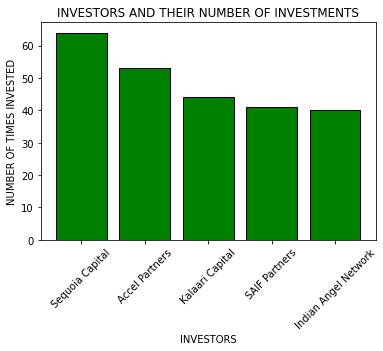

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startupfundings.csv")
df = startup.copy()

df.dropna(subset = ["InvestorsName"],inplace = True)

d = {}
for i in df["InvestorsName"].values:
    if "," in i:
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1

        
        
d1 = sorted(d, key=d.get , reverse=True)[0:5] 
for i in d1:
    print(i)
d={k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}

x=list(d.keys())[0:5]
y=list(d.values())[0:5]

plt.bar(x,y, edgecolor='black', color='green')
plt.xticks(rotation=45)
plt.title('INVESTORS AND THEIR NUMBER OF INVESTMENTS')
plt.xlabel('INVESTORS')
plt.ylabel('NUMBER OF TIMES INVESTED')
plt.show()


3)

Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


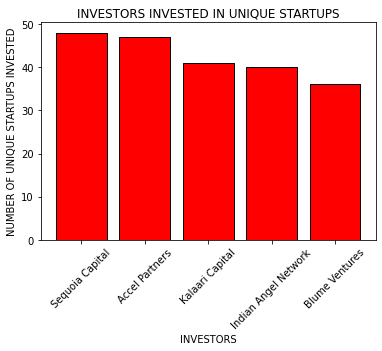

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startupfundings.csv")
df = startup.copy()

df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)

df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
d = {}
for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = e.strip()
        if a in d: 
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
            
d1 = {}
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
    
d2 = sorted(d1, key=d1.get , reverse=True)[0:5]
for i in d2:
    print(i)
    
d3={}
for i in d:
    d3[i]=len(d[i])

d3={k: v for k, v in sorted(d3.items(), key=lambda item: item[1],reverse=True)}
del d3['']



x=list(d3.keys())[0:5]
y=list(d3.values())[0:5]

plt.bar(x,y, edgecolor='black', color='red')
plt.xticks(rotation=45)
plt.title('INVESTORS INVESTED IN UNIQUE STARTUPS')
plt.xlabel('INVESTORS')
plt.ylabel('NUMBER OF UNIQUE STARTUPS INVESTED')
plt.show()

    

    


4)

c:\program files (x86)\python38-32\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


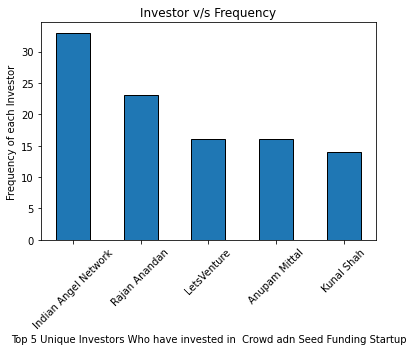

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startupfundings.csv' , encoding ='utf-8')
df


df['StartupName'] = df['StartupName'].str.lower()
df['StartupName'].replace(['flipkart.com','flipkart'],'flipkart',inplace=True)
df['StartupName'].replace(['oyo rooms','oyorooms','oyo'],'oyo',inplace=True)
df['StartupName'].replace(['ola','ola cabs'],'ola',inplace=True)
df['StartupName'].replace(['paytm marketplace','paytm'],'paytm',inplace=True)


invest_type = df['InvestmentType']
invest_type = invest_type.unique()
invest_type


df['InvestmentType'].replace('SeedFunding',"Seed Funding",inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)


arr = df[['InvestorsName','InvestmentType','StartupName']]
arr1= arr[(arr['InvestmentType'] == 'Seed Funding') | (arr['InvestmentType'] == 'Crowd Funding')]
arr1


arr1.drop('InvestmentType',inplace=True,axis = 1)# dropping null values from data Frame and dropping column investment type
arr1


arr2 = arr1['InvestorsName'].str.split(',',expand=True)
arr2.columns =['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
arr2['StartupName'] = arr1['StartupName']# adding startup column in the data Frame
arr2


#getting unique startupname values from the data frame
arr3 = arr2['StartupName'].unique()
arr3


df1 = arr2.groupby('StartupName')#grouping by according to startup name


# Creating List
l = []
for key in range(len(arr3)):
    df2 = df1.get_group(arr3[key])
    s = set()
    for i in range(len(df2)):
        for j in range(len(df2.columns)):
            if(type(df2.iloc[i,j])==str ):
                s.add(df2.iloc[i,j].strip())# adding elemnets to set
                t = list(s)# Converting set to list
            else:
                continue
    l.append(t)    #appending each list into another list list l
l


d = {}
for i in range(len(l)):
    for j in range(len(l[i])):
        temp = l[i][j]
        d[temp] = d.get(temp,0)+1


t = {}# taking another dictionary havng no null values from dictionary d
for i in d:
    if(i !=''): # removing null string 
        t[i]=d[i]
del t['Undisclosed Investors']# removing Undisclosed Investors
del t['Undisclosed investors']


from collections import Counter
dic = dict(Counter(t).most_common(5))
x = [] 
y= []
for i in dic:
    x.append(i) #Getting keys from dictionary
    y.append(dic[i])# Getting Freq of the values
    print(i,dic[i])


plt.bar(x,y,edgecolor ='black',width=0.5)
plt.xlabel('Top 5 Unique Investors Who have invested in  Crowd adn Seed Funding Startup')
plt.ylabel('Frequency of each Investor')
plt.xticks(rotation =45)
plt.title('Investor v/s Frequency')
plt.show()

5)

Sequoia Capital
Accel Partners
Kalaari Capital
Blume Ventures
SAIF Partners


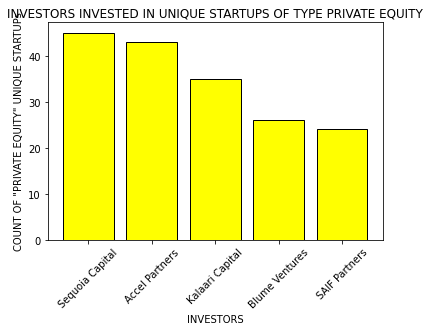

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startupfundings.csv")
df = startup.copy()


df.loc[df.InvestmentType == 'Crowd funding'] = 'Crowd Funding'
df.loc[df.InvestmentType == 'PrivateEquity'] = 'Private Equity'
df.loc[df.InvestmentType == 'SeedFunding'] = 'Seed Funding'

df.InvestmentType.loc[df.InvestmentType == 'Crowd funding'] = 'Crowd Funding'
df.InvestmentType.loc[df.InvestmentType == 'PrivateEquity'] = 'Private Equity'
df.InvestmentType.loc[df.InvestmentType == 'SeedFunding'] = 'Seed Funding'

df=df[df['InvestmentType']=='Private Equity']

df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)

df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)


d = {}
for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = e.strip()
        if a in d: 
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
            
d1 = {}
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
    
d2 = sorted(d1, key=d1.get , reverse=True)[0:5]
for i in d2:
    print(i)
    
    
d3={}
for i in d:
    d3[i]=len(d[i])

d3={k: v for k, v in sorted(d3.items(), key=lambda item: item[1],reverse=True)}
del d3['']


x=list(d3.keys())[0:5]
y=list(d3.values())[0:5]

plt.bar(x,y, edgecolor='black', color='yellow')
plt.xticks(rotation=45)
plt.title('INVESTORS INVESTED IN UNIQUE STARTUPS OF TYPE PRIVATE EQUITY')
plt.xlabel('INVESTORS')
plt.ylabel('COUNT OF "PRIVATE EQUITY" UNIQUE STARTUPs')
plt.show()